In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("Park.csv")
df = df.dropna()
df = df.set_index('Date')
df.head()

,Disney,AAL,BOALF,FUN,MCD,SEAS,SIX
Date,,,,,,,
10/24/2017,103.44,46.46,5.55,62.20,172.87,12.15,62.09
10/23/2017,103.60,47.51,5.55,63.63,171.97,12.15,61.27
10/20/2017,103.69,47.45,5.55,63.53,170.43,12.38,60.82
10/19/2017,103.17,47.36,5.55,63.88,171.34,12.19,60.65
10/18/2017,104.74,47.84,5.55,63.55,168.96,12.31,60.36


In [4]:
# summarize the data
df.describe()

,Disney,AAL,BOALF,FUN,MCD,SEAS,SIX
count,1178.00000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,94.23056,38.344686,4.229015,55.154041,112.834975,21.691256,47.640594
std,15.16963,11.096442,0.555173,7.849535,21.058040,7.062481,8.910877
min,60.69000,7.710000,3.310000,39.000000,88.460000,12.100000,31.930000
25%,84.75750,35.260000,3.850000,49.617500,96.262500,17.332500,39.695000
50%,97.69000,40.820000,4.120000,54.975000,101.505000,18.835000,47.520000
75%,106.00000,46.205000,4.650000,59.317500,122.835000,28.835000,56.362500
max,121.69000,55.760000,5.550000,72.290000,172.870000,38.920000,64.880000


In [5]:
df.shape

(1178, 7)

In [6]:
# check the column names
df.columns

Index(['Disney', 'AAL', 'BOALF', 'FUN', 'MCD', 'SEAS', 'SIX'], dtype='object')

In [7]:
# Create  new data frame CDF AND VIZ from existing dataframe
# New dataframe contains selected columns from old dataframe
cdf=df[['Disney', 'AAL', 'BOALF', 'FUN', 'MCD', 'SEAS', 'SIX']]
cdf.head()

,Disney,AAL,BOALF,FUN,MCD,SEAS,SIX
Date,,,,,,,
10/24/2017,103.44,46.46,5.55,62.20,172.87,12.15,62.09
10/23/2017,103.60,47.51,5.55,63.63,171.97,12.15,61.27
10/20/2017,103.69,47.45,5.55,63.53,170.43,12.38,60.82
10/19/2017,103.17,47.36,5.55,63.88,171.34,12.19,60.65
10/18/2017,104.74,47.84,5.55,63.55,168.96,12.31,60.36


In [9]:

viz= cdf[['Disney', 'AAL', 'BOALF', 'FUN', 'MCD', 'SEAS', 'SIX']]
viz.hist
viz.fillna(0)
pass

C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD133F3128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CD14A70588>]], dtype=object)

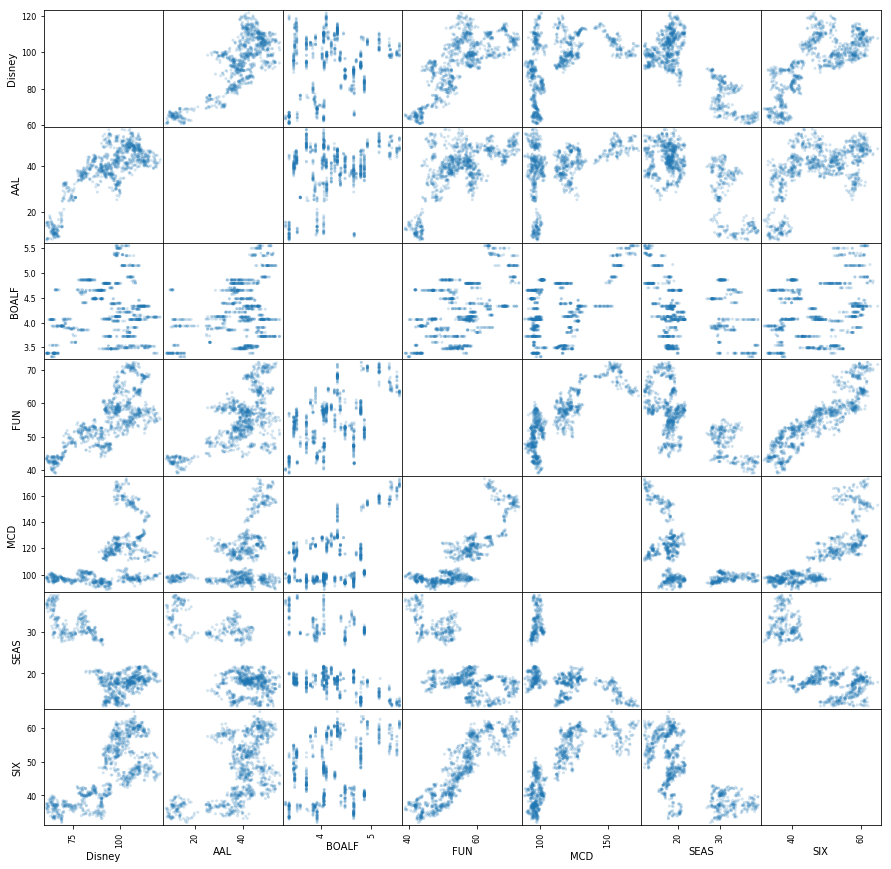

In [10]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cdf, alpha=0.2, figsize=(15, 15), diagonal = 'orange')

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

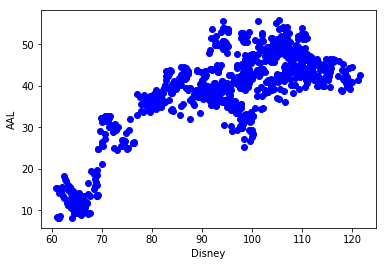

In [13]:
plt.scatter(train.Disney,train.AAL, color = 'blue')
plt.xlabel("Disney")
plt.ylabel("AAL")
plt.show()

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AAL']])
train_y = np.asanyarray(train[['Disney']])
regr.fit(train_x,train_y)

# The coefficients

print ('Coefficients : ',regr.coef_)
print ('Intercept : ',regr.intercept_)
print ('R-Square :', regr.score(train_x, train_y))


Coefficients :  [[ 1.0903403]]
Intercept :  [ 52.51274353]
R-Square : 0.638436712588


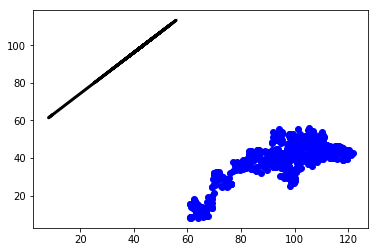

In [16]:
train_y_ = regr.predict(train_x)
plt.scatter(train.Disney,train.AAL, color ='blue')
plt.plot(train_x, train_y_, color='black', linewidth =3)

In [17]:

test_x = np.asanyarray(test[['Disney']])
test_y = np.asanyarray(test[['AAL']])
test_y_ = regr.predict(test_x)

print ("Residual Sum of Squares : %.2f"
      % np.mean((test_y_ - test_y)**2))

# Explained variance score : 1 is perfect prediction

print('Variance Score : %.2f' % regr.score(test_x,test_y))

Residual Sum of Squares : 13670.19
Variance Score : -103.71


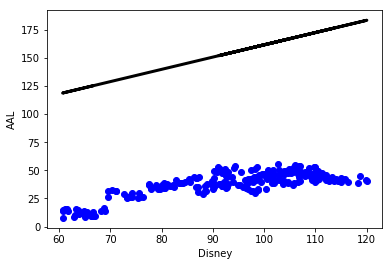

In [18]:

plt.scatter(test_x,test_y, color ='blue')
plt.plot(test_x, test_y_, color ='black', linewidth =3)
plt.xlabel("Disney")
plt.ylabel("AAL")
plt.show()

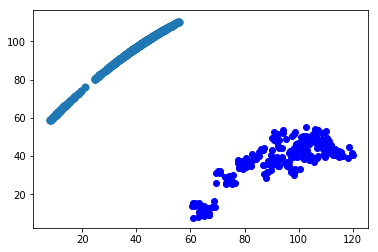

In [19]:

#Non-Linear Model 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),Ridge())
model.fit(train_x,train_y)
train_y_ = model.predict(train_x)
plt.scatter(test_x,test_y, color = 'blue')
plt.scatter(train_x,train_y_,linewidth = 2)

In [20]:


#Multiple Linear Regression Model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['AAL', 'BOALF', 'FUN', 'MCD', 'SEAS', 'SIX']])
y = np.asanyarray(train[['Disney']])
regr.fit (x, y)
predictions = model.predict(y)

#  The Coefficients

print ('Coefficients : ',regr.coef_)
print ('R-Square :', regr.score(x, y))



Coefficients :  [[ 0.48464575 -7.15396074  1.09295921 -0.19536144 -0.61988611  0.21421534]]
R-Square : 0.872297988422


In [21]:
#Multiple Linear Regression Model
y_=regr.predict(test[['AAL', 'BOALF', 'FUN', 'MCD', 'SEAS', 'SIX']])
x = np.asanyarray(test[['AAL', 'BOALF', 'FUN', 'MCD', 'SEAS', 'SIX']])
y = np.asanyarray(test[['Disney']])
print("Residual Sum of Squares : %.2f"
     %np.mean((y_ -y)**2))

#Explained Variance Score : 1 is perfect prediction

print('Variance Score : %.2f' % regr.score(x,y))

Residual Sum of Squares : 30.29
Variance Score : 0.88


In [22]:
import statsmodels.api as sm
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()


C:\Users\rushi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6594.
Date:                Sun, 10 Dec 2017   Prob (F-statistic):          1.15e-267
Time:                        22:09:16   Log-Likelihood:                -859.81
No. Observations:                 251   AIC:                             1732.
Df Residuals:                     245   BIC:                             1753.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6060      0.071      8.564      0.000       0.467       0.745
x2            -1.2900      1.095     -1.178      0.240      -3.446       0.866
x3             1.3908      0.188      7.416      0.000       1.021       1.760
x4            -0.3276      0.048     -6.817      0.000      -0.422      -0.233
x5             0.2060      0.069      3.004      0.003       0.071       0.341
x6             0.6676      0.147      4.547      0.000       0.378       0.957
==============================================================================
Omnibus:                        8.156   Durbin-Watson:                   0.215
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.133
Skew:                           0.436   Prob(JB):                       0.0171
Kurtosis:                       3.129   Cond. No.                         326.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Multiple Linear Regression Model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['AAL', 'FUN', 'MCD', 'SEAS', 'SIX']])
y = np.asanyarray(train[['Disney']])
regr.fit (x, y)


#  The Coefficients

print ('Intercept : ',regr.intercept_)
print ('Coefficients : ',regr.coef_)
print ('R-Square :', regr.score(x, y))


Intercept :  [ 53.99002975]
Coefficients :  [[ 0.4724175   0.69222037 -0.30445435 -0.56869577  0.64206102]]
R-Square : 0.833076763722


In [26]:
import statsmodels.api as sm
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.156e+04
Date:                Sun, 10 Dec 2017   Prob (F-statistic):               0.00
Time:                        22:39:25   Log-Likelihood:                -3156.5
No. Observations:                 927   AIC:                             6323.
Df Residuals:                     922   BIC:                             6347.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6561      0.034     19.583      0.000       0.590       0.722
x2             1.0470      0.085     12.381      0.000       0.881       1.213
x3            -0.2995      0.022    -13.752      0.000      -0.342      -0.257
x4             0.2140      0.032      6.602      0.000       0.150       0.278
x5             0.8434      0.068     12.437      0.000       0.710       0.976
==============================================================================
Omnibus:                       46.315   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.987
Skew:                           0.564   Prob(JB):                     5.14e-12
Kurtosis:                       3.271   Cond. No.                         62.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""